In [1]:
import os
from tabulate import tabulate
from bs4 import BeautifulSoup
from tabulate import tabulate

class JEMHEphemeraDoc:
    """
        Data members: (should be self explanatory)
        fileName            | str
        filesDir            | str
        year                | int
        placeOfPublication  | str
        text                | str list
        rawSize_ch          | int | # of chars in body of document
        """

    """
    JEMHDocParser is used to read the XML files where ephemera from JEMH corpus are stored.
    """

    # inner class to read XML files of ephemera
    class JEMHEphemeraDocParser:
        @staticmethod
        def createSoup(fileName, fileDir):
            infile = open(fileDir + "/" + fileName, "r")
            soup = BeautifulSoup(infile.read(), 'xml')

            return soup

        @staticmethod
        def parseMetadata(fileName, fileDir):

            soup = JEMHEphemeraDoc.JEMHEphemeraDocParser.createSoup(fileName, fileDir)
            
            date = soup.find('date')
            year = int(date['when'][0:4])

            # xml address to place of publication
            placeOfPublication = soup.find('pubPlace').get_text()

            return year, placeOfPublication

        @staticmethod
        def parseText(fileName, fileDir):
            soup = JEMHEphemeraDoc.JEMHEphemeraDocParser.createSoup(fileName, fileDir)
            texts = soup.find_all('p')
            corp = [text.get_text() for text in texts]
            return corp
        
        def getRaw_Size_ch(sentence_list):
            size = 0
            
            for sentence in sentence_list:
                size += len(sentence)
                
            return size

    def __init__(self, fileName, fileDir):
        self.fileName = fileName
        self.fileDir = fileDir

        self.year, self.placeOfPublication = JEMHEphemeraDoc.JEMHEphemeraDocParser.parseMetadata(fileName, fileDir)
        self.text = JEMHEphemeraDoc.JEMHEphemeraDocParser.parseText(fileName, fileDir)
        self.raw_size_ch = JEMHEphemeraDoc.JEMHEphemeraDocParser.getRaw_Size_ch(self.text)

    def __iter__(self):
        return (t for t in self.fileName)

    def __str__(self):
        file = self.fileName + '\n'
        year_and_place = self.placeOfPublication + ", " + str(self.year) + '\n'
        body = ""
        for t in self.text:
            body += t + '\n'

        return file + year_and_place + body

    # Accessors
    def getFileName(self):
        return self.fileName

    def getFileDir(self):
        return self.fileDir

    def getYear(self):
        return self.year

    def getPlaceOfPublication(self):
        return self.placeOfPublication

    def getText(self):
        return self.text
    
    def getRaw_Size_ch(self):
        return self.raw_size_ch

    def getMetadata(self):
        return self.fileName, self.year, self.placeOfPublication

In [2]:
import pandas as pd

class JEMHEphemeraFrame:
    
    def __init__(self, fileDir):
        if type(fileDir) == str:
            self.docs = [JEMHEphemeraDoc(file, fileDir) for file in os.listdir(fileDir) if file.endswith('.xml')]
        elif type(fileDir) == list:
            self.docs = [file for file in fileDir]
        else:
            self.docs = []
         
        fileNames = [doc.getFileName() for doc in self.docs]
        fileDirs = [doc.getFileDir() for doc in self.docs]
        years = [doc.getYear() for doc in self.docs]
        PlacesofPublication = [doc.getPlaceOfPublication() for doc in self.docs]
        texts = [doc.getText() for doc in self.docs]
        raw_sizes_ch = [doc.getRaw_Size_ch() for doc in self.docs]
        
        dfData = {'fileName' : fileNames, 'fileDir' : fileDirs, 'Year' : years, 'Place of Pub' : PlacesofPublication, 'Raw_Size_ch' : raw_sizes_ch}
        
        self.df = pd.DataFrame(dfData)

    def __str__(self):
        header = ['File Name', 'Year', 'Place']
        return tabulate([doc.getMetadata() for doc in self.docs], header)

    def __iter__(self):
        return [doc for doc in self.docs]

    def getDocs(self):
        return self.docs
    
    def getFrame(self):
        return self.df

    def filterYear(self, year):
        return JEMHEphemeraFrame([doc for doc in self.docs if doc.getYear() == year])

    def filterBetweenYears(self, startYear, endYear):
        return JEMHEphemeraFrame([doc for doc in self.docs if doc.getYear() in range(startYear, endYear)])

    def filterBeforeYear(self, endYear):
        return JEMHEphemeraFrame([doc for doc in self.docs if doc.getYear() < endYear])

    def filterAfterYear(self, startYear):
        return JEMHEphemeraFrame([doc for doc in self.docs if doc.getYear() >= startYear])


In [12]:
TESTDIR_EPHEMERA = 'JEMHCorpus/ephemera/street_ads/TEI'

corp = JEMHEphemeraFrame(TESTDIR_EPHEMERA)
print(corp)

File Name        Year  Place
-------------  ------  -------
700174487.xml    1932  חיפה
700174267.xml    1928  חיפה
700172537.xml    1951  חיפה
700173367.xml    1945  חיפה
700172506.xml    1953  חיפה
700173181.xml    1942  חיפה
700173284.xml    1948  חיפה
700173021.xml    1948  חיפה
700174421.xml    1946  חיפה
700173047.xml    1948  חיפה
700174341.xml    1930  חיפה
700173971.xml    1951  חיפה
700174097.xml    1954  חיפה
700173363.xml    1945  חיפה
700172943.xml    1947  חיפה
700173581.xml    1939  חיפה
700173548.xml    1937  חיפה
700174139.xml    1951  חיפה
700173009.xml    1948  חיפה
700174113.xml    1953  חיפה
700173409.xml    1944  חיפה
700173974.xml    1953  חיפה
700173189.xml    1950  חיפה
700173303.xml    1948  חיפה
700173531.xml    1947  חיפה
700173538.xml    1938  חיפה
700174357.xml    1925  חיפה
700174404.xml    1946  חיפה
700173859.xml    1959  חיפה
700172963.xml    1948  חיפה
700172500.xml    1954  חיפה
700174376.xml    1932  חיפה
700173188.xml    1938  חיפה
700174420.xml   

In [45]:
# cas was here
# Filter WW2 1939-1945
corpus = corp.getFrame()
start = corpus["Year"] >= 1939
end = corpus["Year"] <= 1945
during = start & end
ww2 = corpus.loc[during]
print(ww2)

## broken
# ...is it?
# checking...
ww2_years = [year for year in ww2["Year"]]
print("Years", set(ww2_years), "\nRows", len(ww2_years)) 
# I don't see any years outside range 1939-1945 here
# (but you're right that I didn't notice the object has a filter built in for this!)

          fileName                             fileDir  Year Place of Pub  \
3    700173367.xml  JEMHCorpus/ephemera/street_ads/TEI  1945         חיפה   
5    700173181.xml  JEMHCorpus/ephemera/street_ads/TEI  1942         חיפה   
13   700173363.xml  JEMHCorpus/ephemera/street_ads/TEI  1945         חיפה   
15   700173581.xml  JEMHCorpus/ephemera/street_ads/TEI  1939         חיפה   
20   700173409.xml  JEMHCorpus/ephemera/street_ads/TEI  1944         חיפה   
..             ...                                 ...   ...          ...   
233  700173405.xml  JEMHCorpus/ephemera/street_ads/TEI  1944         חיפה   
234  700173672.xml  JEMHCorpus/ephemera/street_ads/TEI  1943         חיפה   
236  700173418.xml  JEMHCorpus/ephemera/street_ads/TEI  1944         חיפה   
237  700173628.xml  JEMHCorpus/ephemera/street_ads/TEI  1943         חיפה   
238  700173653.xml  JEMHCorpus/ephemera/street_ads/TEI  1942         חיפה   

     Raw_Size_ch  
3            998  
5            536  
13           595  

##### more notes from cas
FYI it looks like `filterBetweenYears(start,end)` might be excluding the end year because of how `range()` works

(you may notice there's no entries from 1945, it's actually showing 1939-1944)

If you want it to include the end year, you can use `range(startYear, endYear + 1)` when you make the filter

If you change the below to `filterBetweenYears(1939, 1946)` so it doesn't skip 1945, it's the same as the selection I did above.

In [48]:
#Filter ww2 documents only
corp_1939_1945 = corp.filterBetweenYears(1939, 1946)

print(corp_1939_1945.getFrame())

         fileName                             fileDir  Year Place of Pub  \
0   700173367.xml  JEMHCorpus/ephemera/street_ads/TEI  1945         חיפה   
1   700173181.xml  JEMHCorpus/ephemera/street_ads/TEI  1942         חיפה   
2   700173363.xml  JEMHCorpus/ephemera/street_ads/TEI  1945         חיפה   
3   700173581.xml  JEMHCorpus/ephemera/street_ads/TEI  1939         חיפה   
4   700173409.xml  JEMHCorpus/ephemera/street_ads/TEI  1944         חיפה   
..            ...                                 ...   ...          ...   
59  700173405.xml  JEMHCorpus/ephemera/street_ads/TEI  1944         חיפה   
60  700173672.xml  JEMHCorpus/ephemera/street_ads/TEI  1943         חיפה   
61  700173418.xml  JEMHCorpus/ephemera/street_ads/TEI  1944         חיפה   
62  700173628.xml  JEMHCorpus/ephemera/street_ads/TEI  1943         חיפה   
63  700173653.xml  JEMHCorpus/ephemera/street_ads/TEI  1942         חיפה   

    Raw_Size_ch  
0           998  
1           536  
2           595  
3           348

In [6]:
# hello Iyanu, be sure to clone the corpus into a directory named JEMHCorpus
# I also had to pip install tabulate and pip install lxml

Matplotlib is building the font cache; this may take a moment.


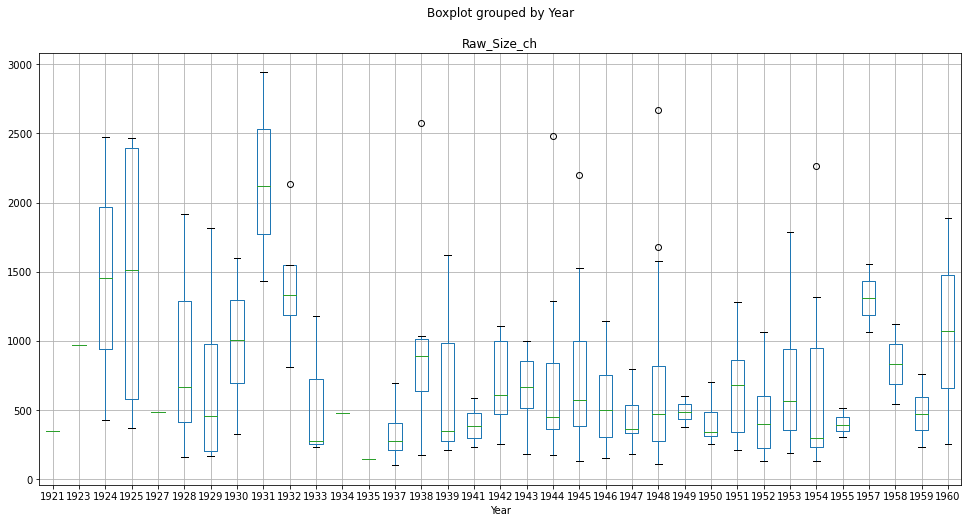

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#box plot of entire corpus

corp_frame = corp.getFrame()

corp_frame.boxplot(column='Raw_Size_ch', by='Year', figsize=(16,8))

plt.show()

<AxesSubplot:xlabel='Year'>

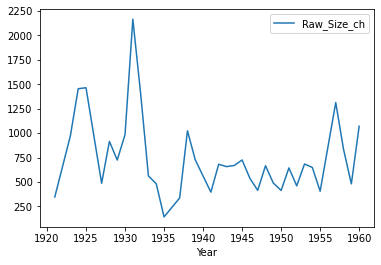

In [104]:
# average char size of docs by year
# btw corpus == corp_frame
%matplotlib inline
by_year = corpus.groupby("Year")

# groupby makes a Series so we have to turn it back into a DataFrame
avgs = pd.DataFrame(by_year["Raw_Size_ch"].mean())
avgs.plot()
#avgs.plot.scatter(x="Raw_Size_ch",y="Year")
# won't turn into a scatterplot
# something's wrong with the columns, it has only 1 column somehow

In [ ]:
# remove null values
# corpus = corpus.dropna(how='any',axis=0) 